In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PALETTE = sns.color_palette("Set2")

CDF code credits:
https://stackoverflow.com/questions/63158257/plot-more-than-one-cdf-in-single-plot

## Fig 9

Note: The 'timed out' results have been removed

### a

In [2]:
percent_plot_compare = pd.read_csv("data/fig9a_data.csv")
percent_plot_compare


URL  Brute Force  Reduction   RBR  Percentage Difference
0    thepiratebay         0.93         20  0.93               0.000000
1             web         0.99          5  1.00               1.010101
2             gmx         0.99         10  1.00               1.010101
3             gmx         0.98         15  0.98               0.000000
4             gmx         0.99          5  1.00               1.010101
..            ...          ...        ...   ...                    ...
126    blackboard         0.99         10  1.00               1.010101
127      evernote         1.00         20  1.00               0.000000
128     kemdikbud         1.00          5  1.00               0.000000
129        office         1.00          5  1.00               0.000000
130      digikala         1.00          5  1.00               0.000000

[131 rows x 5 columns]

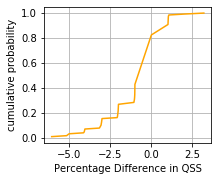

In [3]:
fig, ax = plt.subplots(1, 1)
stats_df = percent_plot_compare \
.groupby('Percentage Difference') \
['Percentage Difference'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'Percentage Difference': 'frequency'})
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df.plot(x = 'Percentage Difference', y = ['cdf'], grid = True,ax=ax,legend=False,figsize=(3,2.5),color="orange")

ax.set_xlabel("Percentage Difference in QSS")
ax.set_ylabel("cumulative probability")
plt.savefig("graphs/cdf_qss_diff.eps", bbox_inches = 'tight')

### b

In [4]:
time_all_cdf = pd.read_csv("data/fig9b_data.csv")
time_all_cdf

URL  Brute Force        RBR
0    thepiratebay     6.926341   0.211348
1             web    81.676082   3.069065
2             gmx    70.585914   3.134372
3      consultant    13.691746   0.455063
4    investopedia    32.530057   0.455124
..            ...          ...        ...
126     kemdikbud    16.357486  57.079140
127      evernote    14.431315   0.000043
128     kemdikbud    16.727020  59.491089
129        office   104.877696   0.000041
130      digikala   327.377744   3.835792

[131 rows x 3 columns]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


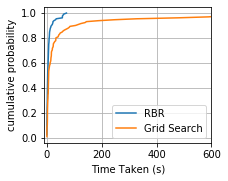

In [5]:
fig, ax = plt.subplots(1, 1)
stats_df = time_all_cdf \
.groupby('RBR') \
['RBR'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'RBR': 'frequency'})
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df.plot(x = 'RBR', y = ['cdf'], grid = True,ax=ax,legend=False,figsize=(5,2))



stats_df = time_all_cdf \
.groupby('Brute Force') \
['Brute Force'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'Brute Force': 'frequency'})
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df.plot(x = 'Brute Force', y = ['cdf'], grid = True,ax=ax,legend=False,figsize=(3,2.5))
ax.set_xlim(-10,600)
ax.legend(['RBR', 'Grid Search'],loc="lower right");
ax.set_xlabel("Time Taken (s)")
ax.set_ylabel("cumulative probability")
plt.savefig("graphs/cdf_time_diff.eps", bbox_inches = 'tight')

## Fig 10

In [6]:
sample_df = pd.read_csv("data/fig10_data.csv",index_col=0)
sample_df = sample_df.sort_values(by="PAW")
sample_df

0.9        0.8       PAW
Uzbekistan            71.593533  85.298013  1.065491
South Africa          50.335570  67.463235  1.134353
Puerto Rico           40.229885  83.809524  1.187396
Trinidad\nand Tobago  45.698925  62.730627  1.227423
Senegal               51.592357  71.074380  1.245199
Ecuador               40.800000  59.615385  1.248233
Jamaica               43.650794  66.225166  1.335987
Mongolia              47.863248  65.142857  1.342853
Colombia              38.604651  61.637931  1.362264
Kyrgyzstan            45.604396  67.871486  1.401366
Kenya                 43.850267  59.778598  1.417973
Bolivia               43.842365  59.866221  1.477946
El Salvador           47.826087  70.000000  1.544298
Cameroon              37.323944  53.299492  1.677116
Lebanon               37.967914  91.358025  1.698163
Sudan                 28.947368  48.000000  1.701342
Dominican\nRepublic   30.000000  88.135593  1.801713
Jordan                35.099338  59.512195  1.895220
Guatemala             34.931507  53.201970  1.951649
Cote d'Ivoire         36.585366  62.500000  2.171701
Tanzania              36.697248  53.424658  2.497348
Yemen                 27.631579  38.834951  3.472016
Uganda                22.972973  46.428571  3.828759
Ethiopia              32.692308  59.259259  3.896124
Honduras              21.276596  47.272727  4.072404

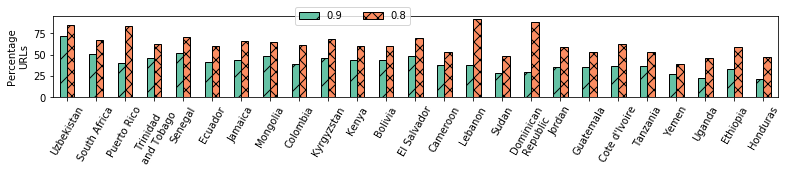

In [7]:
sample_df.drop("PAW",axis=1,inplace=True)
ax = sample_df.plot(kind="bar",color=PALETTE,figsize=(13,1.5),rot=60,edgecolor="black")

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(sample_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    bar.set_edgecolor('k')
    
ax.set_ylabel("Percentage\nURLs")
ax.legend(loc='center right', bbox_to_anchor=(0.5, 1), ncol=2)
plt.savefig(f"graphs/new_paw_sampling_tests.pdf", bbox_inches = 'tight')

## Fig 11

In [8]:
full_framework = pd.read_csv("data/fig11_data.csv",index_col=0)

In [9]:
full_framework

URL  Reduction       QSS       QFS  Quality  \
0               www.zoom.us  27.718412  0.998289  0.000000     0.50   
1                www.qq.com  81.541415  1.000000  0.000000     0.50   
2             www.shopee.tw  81.719000  0.999978  0.000000     0.50   
3               www.gmx.net  39.410790  1.000000  0.000000     0.50   
4            www.paypal.com  76.218528  1.000000  0.000000     0.50   
5             www.intel.com  83.728272  1.000000  0.000000     0.50   
6          www.tsichuan.com  68.726501  1.000000  0.000000     0.50   
7            www.cybozu.com  67.827062  1.000000  0.000000     0.50   
8         www.office365.com  40.986452  1.000000  0.000000     0.50   
9          www.testbook.com  34.179554  0.999877  0.000000     0.50   
10         www.linkedin.com  69.670113  1.000000  0.000000     0.50   
11               www.hp.com  81.165530  1.000000  0.013216     0.51   
12            www.skype.com  32.275776  1.000000  0.071930     0.54   
13           www.fandom.com  52.221628  1.000000  0.417747     0.71   
14        www.thethao247.vn  82.473526  0.999966  0.499818     0.75   
15           www.kompas.com  43.349924  1.000000  0.625953     0.81   
16          www.spotify.com  68.839981  1.000000  0.702340     0.85   
17             www.dawn.com  34.507183  0.999993  0.849118     0.92   
18            www.pixlr.com  46.344499  0.911163  1.000000     0.96   
19          www.okezone.com  28.585595  0.926322  1.000000     0.96   
20            www.amazon.fr  28.107871  0.930764  1.000000     0.97   
21               www.so.com  10.223765  0.942598  1.000000     0.97   
22              www.mlb.com  66.600169  1.000000  0.935807     0.97   
23  www.mercadolibre.com.mx  28.443224  0.948621  1.000000     0.97   
24         www.flipkart.com  27.274069  0.937667  1.000000     0.97   
25             www.rezka.ag  26.880370  0.943761  1.000000     0.97   
26            www.amazon.es  27.132646  0.964549  1.000000     0.98   
27      www.elwatannews.com  76.932152  1.000000  0.957750     0.98   
28             www.cyol.com  27.221824  0.954009  1.000000     0.98   
29            www.tianya.cn  23.884899  0.959687  1.000000     0.98   
30            www.tmall.com  24.210794  0.951940  1.000000     0.98   
31            www.amazon.it  26.723117  0.969702  1.000000     0.98   
32        www.xinhuanet.com  34.204055  0.969419  1.000000     0.98   
33           www.amazon.com  24.879487  0.977051  1.000000     0.99   
34          www.asriran.com  73.026890  1.000000  0.973540     0.99   
35            www.yahoo.com  28.438521  0.970590  1.000000     0.99   
36        www.goldcarpet.cn  26.603460  0.976592  1.000000     0.99   
37            www.amazon.in  23.665421  0.974159  1.000000     0.99   
38         www.amazon.co.jp  26.534284  0.974663  1.000000     0.99   
39  www.mercadolibre.com.ar  27.600959  0.984659  1.000000     0.99   
40          www.behance.net  29.738919  0.975333  1.000000     0.99   
41        www.google.com.sa  88.203725  1.000000  0.999646     1.00   
42        www.rtl-theme.com  54.918111  1.000000  0.999806     1.00   
43        www.google.com.mx  37.150207  1.000000  0.997400     1.00   
44         www.google.co.th  87.791940  1.000000  0.997341     1.00   
45             www.goal.com  56.415408  1.000000  1.000000     1.00   
46              www.box.com  75.282499  1.000000  1.000000     1.00   
47            www.bitly.com  69.548078  1.000000  0.999833     1.00   
48          www.azadseo.com  28.758186  0.999845  1.000000     1.00   
49         www.google.co.id  53.418572  1.000000  0.999145     1.00   
50         www.google.co.kr  61.519191  1.000000  0.999133     1.00   
51            www.google.pl  53.853732  1.000000  0.999371     1.00   
52        www.google.com.eg  60.050363  1.000000  0.998733     1.00   
53           www.aparat.com  52.967673  0.996891  1.000000     1.00   
54         www.japanpost.jp  88.039266  1.000000  0.999910     1.00   
55        www.wordpress.com  56.502900  1.000000

### a

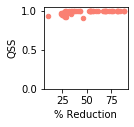

In [10]:
ax = full_framework[["Reduction", "QSS"]].plot(kind="scatter",x="Reduction",y="QSS",figsize=(1.5,1.5),color="salmon")
ax.set_xlabel("% Reduction")
ax.set_ylim(0,1.05)
plt.savefig("graphs/full_framework_qss.eps", bbox_inches = 'tight')

### b

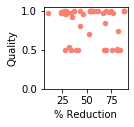

In [11]:
ax = full_framework[["Reduction", "Quality"]].plot(kind="scatter",x="Reduction",y="Quality",figsize=(1.5,1.5),color="salmon")
ax.set_xlabel("% Reduction")
ax.set_ylim(0,1.05)
plt.savefig("graphs/new_full_framework_quality.eps", bbox_inches = 'tight')

### c

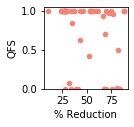

In [12]:
ax = full_framework[["Reduction", "QFS"]].plot(kind="scatter",x="Reduction",y="QFS",figsize=(1.5,1.5),color="salmon")
ax.set_xlabel("% Reduction")
ax.set_ylim(0,1.05)
plt.savefig("graphs/full_framework_qfs.eps", bbox_inches = 'tight')